In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.datasets import load_digits
from sklearn import preprocessing,linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn


## Loading DataSet

In [457]:
training = pd.read_csv("train.csv")


## Exploring data:
Data from Kaggel:
    [data](https://www.kaggle.com/c/digit-recognizer/data)

In [458]:
training.shape

(42000, 785)

In [459]:
images_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [460]:
images = training.iloc[0:5000 , 1:]
labels = training.iloc[0:5000 , 0]

## Splitting Data 

In [461]:
images_train, images_test, labels_train,labels_test = train_test_split(images,labels,test_size = 0.2)


## Visualizing Digits:

Text(0.5, 1.0, '6')

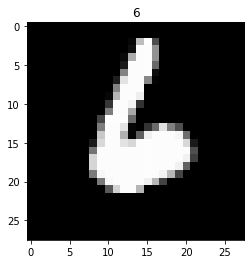

In [462]:
i=5
img=images_train.iloc[i].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(labels_train.iloc[i])


## 1. Using Logistic Regression to predict one digit:

In [463]:
labels_train5 = (labels_train == 5)
labels_test5 = (labels_test == 5)


In [464]:
model = LogisticRegression(max_iter=10000)
model.fit(images_train,labels_train5)

LogisticRegression(max_iter=10000)

## Accuracy

In [465]:
model.score(images_test,labels_test5)

0.951

## 2. Confusion Matrix

In [466]:
predicted =cross_val_predict(model, images_train,labels_train5,cv=3)
cm = confusion_matrix(labels_train5, predicted)
cm

array([[3501,  123],
       [  95,  281]], dtype=int64)

Text(33.0, 0.5, 'truth')

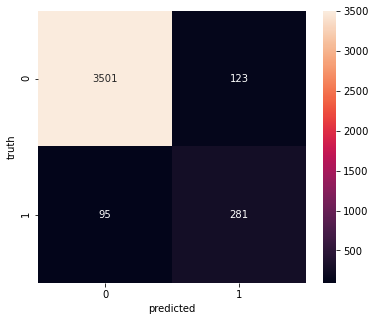

In [467]:
plt.figure(figsize=(6,5))
sn.heatmap(cm,annot= True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('truth')

## 3. Logistic regrission to classify the 10 digits (Multiclassification):
    

In [468]:
model.fit(images_train, labels_train)

LogisticRegression(max_iter=10000)

In [469]:
model.score(images_test, labels_test)

0.863

In [470]:
results =model.predict(images_test)

In [471]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(labels_test, results)
cm2

array([[ 94,   0,   1,   0,   0,   2,   3,   0,   1,   2],
       [  0, 112,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   2,  87,   6,   2,   1,   3,   0,   3,   1],
       [  0,   2,   4,  75,   0,   3,   0,   1,   4,   4],
       [  0,   0,   0,   0,  95,   0,   6,   3,   2,   9],
       [  3,   0,   2,   2,   4,  69,   0,   0,   9,   4],
       [  0,   0,   1,   0,   1,   1,  99,   1,   1,   0],
       [  1,   0,   0,   2,   1,   0,   0,  81,   0,   5],
       [  2,   2,   0,   4,   1,   3,   0,   1,  69,   3],
       [  1,   0,   2,   3,   2,   2,   0,   6,   0,  82]], dtype=int64)

Text(69.0, 0.5, 'truth')

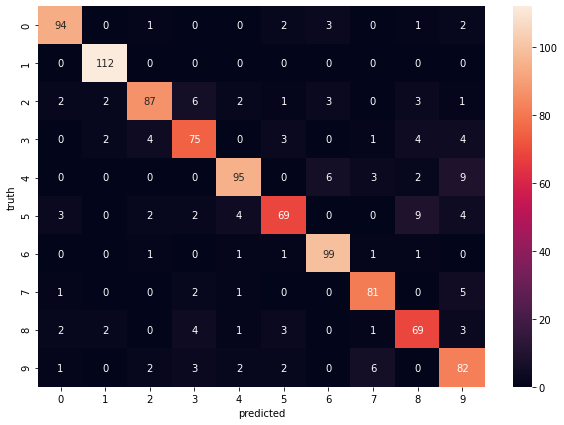

In [472]:
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot= True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('truth')